In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
base_dir = '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

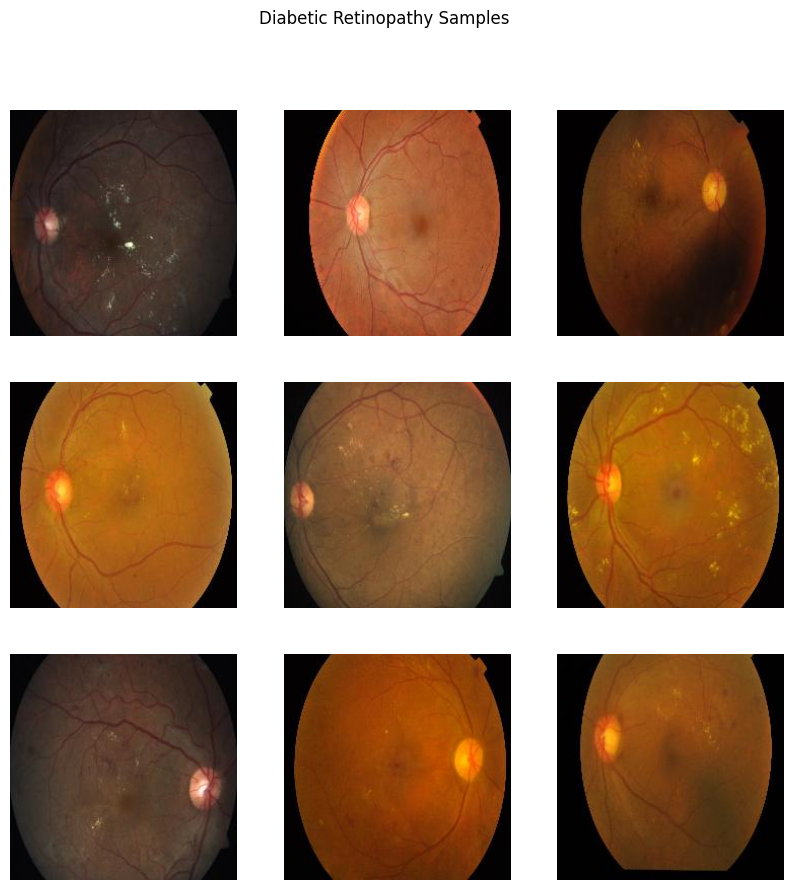

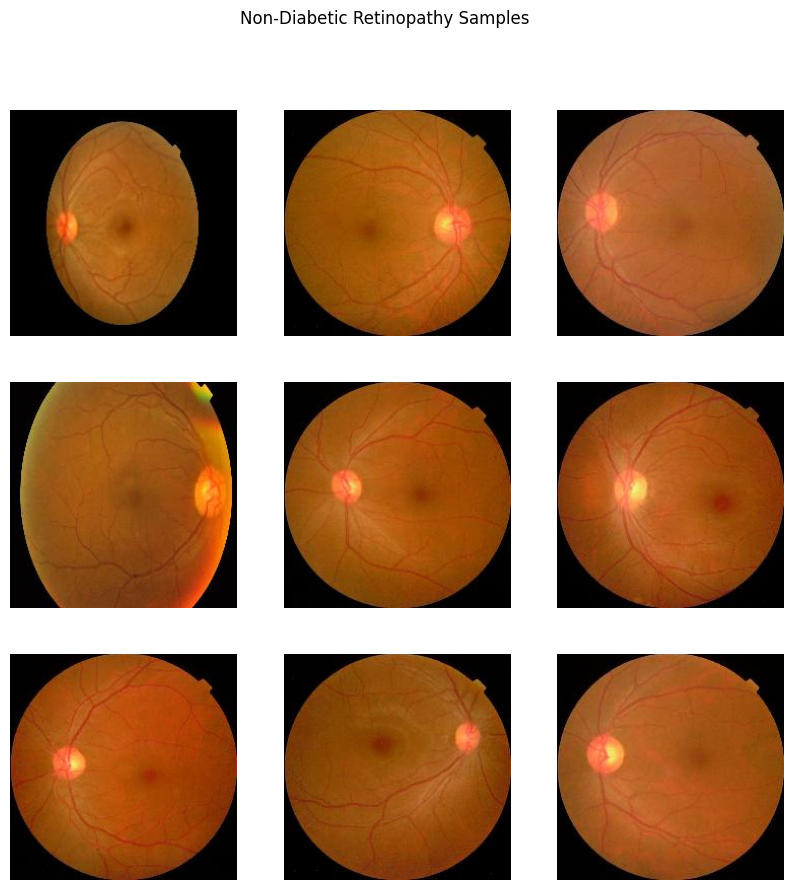

In [5]:
def plot_sample_images(directory, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(os.listdir(directory)[:9]):
        img_path = os.path.join(directory, img)
        img_data = plt.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_data)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
    
plot_sample_images(os.path.join(train_dir, 'DR'), 'Diabetic Retinopathy Samples')
plot_sample_images(os.path.join(train_dir, 'No_DR'), 'Non-Diabetic Retinopathy Samples')

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150), class_mode='binary')

Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-06 11:37:54.917063: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 799ms/step - accuracy: 0.6858 - loss: 0.8009 - val_accuracy: 0.8606 - val_loss: 0.3148
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 767ms/step - accuracy: 0.8649 - loss: 0.3265 - val_accuracy: 0.8625 - val_loss: 0.3209
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 767ms/step - accuracy: 0.8634 - loss: 0.2942 - val_accuracy: 0.9303 - val_loss: 0.2160
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 771ms/step - accuracy: 0.9073 - loss: 0.2386 - val_accuracy: 0.9134 - val_loss: 0.2329
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 49s 749ms/step - accuracy: 0.9148 - loss: 0.2324 - val_accuracy: 0.9247 - val_loss: 0.2224
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 762ms/step - accuracy: 0.9070 - loss: 0.2531 - val_accuracy: 0.8889 - val_loss: 0.3184
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 49s 750ms/step - accuracy: 0.8955 - loss: 0.2533 - val_accuracy: 0.9322 - val_loss: 0.1943
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 52s 797ms/step - accuracy: 0.9164 - loss: 0.2242 - val_accu

In [10]:
model.save("diabetic.h5")

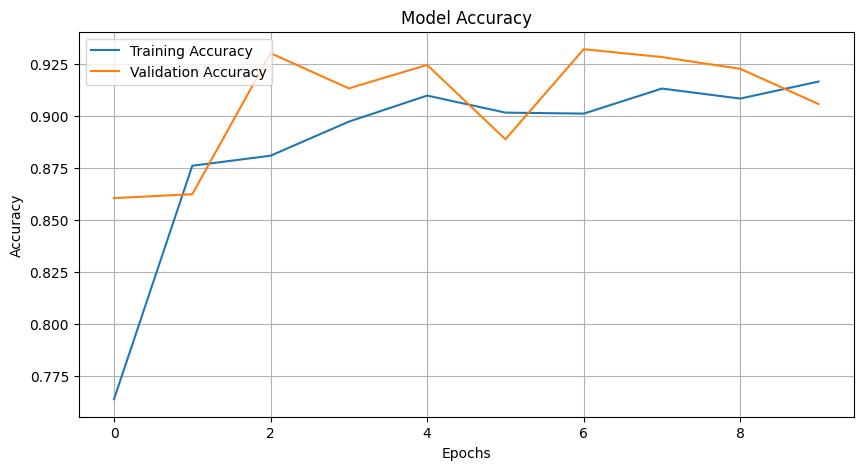

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid()
plt.show()